In [1]:
# Import dependencies and dataset
import pandas as pd
import numpy as np
df=pd.read_csv('dataset.csv') 
df.head()

,Date,rental_count,member_count,humidity,pressure,temperature,wind_direction,wind_speed,precipitation,new_snow,snow_depth,business_day,holiday
0,1/1/2014,6559,95971,77.083,1024.500,270.449,233.833,2.167,0.00,0.00,0.0,0,1
1,1/2/2014,9334,96000,80.542,1018.458,271.284,120.958,3.292,0.33,3.10,0.0,1,0
2,1/3/2014,1288,96042,78.375,1010.542,263.583,228.125,3.583,0.29,3.30,6.0,1,0
3,1/4/2014,2494,96065,71.917,1031.083,262.514,241.583,1.708,0.00,0.00,6.0,0,0
4,1/5/2014,2937,96084,79.333,1024.208,268.074,197.458,0.958,0.14,0.01,4.0,0,0


In [2]:
# Prepare the train and test set for regression analysis
print("Prepare the train and test set for regression analysis")
from sklearn.model_selection import train_test_split
label = df.rental_count 
train = df.drop(columns=['Date', 'rental_count'])
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=2)
# 80% data for training, 20% for testing
print('train parameter shape: ', x_train.shape)
print('test parameter shape: ', x_test.shape)
print('train label shape: ', y_train.shape)
print('test label shape: ', y_test.shape)

Prepare the train and test set for regression analysis
train parameter shape:  (876, 11)
test parameter shape:  (220, 11)
train label shape:  (876,)
test label shape:  (220,)


In [3]:
# Define a function to score for each model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
def scoring(model):
    score = cross_val_score(model, x_train, y_train, cv=15, n_jobs=1, scoring = 'neg_median_absolute_error')
    print('Validation set: mean median absolute error: ', np.median(score)*-1)
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)
    print("Test set: Daily error count: ", mean_squared_error(y_test, predicted))
    y_test.reset_index(drop = True, inplace = True)
    return predicted

# Define a function to plot the performance diagrams for each model and return percent error
import matplotlib.pyplot as plt
def plotGraph(predicted): 
    diff = predicted-y_test
    plt.figure(figsize=(15,6))
    plt.plot(predicted)
    plt.plot(y_test)
    plt.plot(diff.abs())
    plt.legend(['Prediction', 'Acutal', 'Difference'])
    plt.ylabel("Daily Rental Count", fontsize = 16)
    plt.xlabel("Day in Test Set", fontsize = 16)
    plt.show()
    
    percent = diff / y_test
    plt.figure(figsize=(15,6))
    plt.plot(percent.abs())
    plt.legend(['Percent Error'])
    plt.show()
    return percent

* Linear regression model: 
Validation set: mean median absolute error:  5571.209477697383
Test set: Daily error count:  88606433.89902487


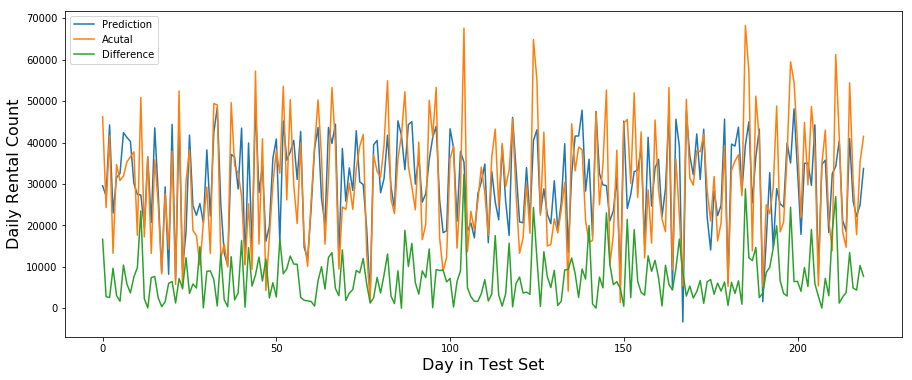

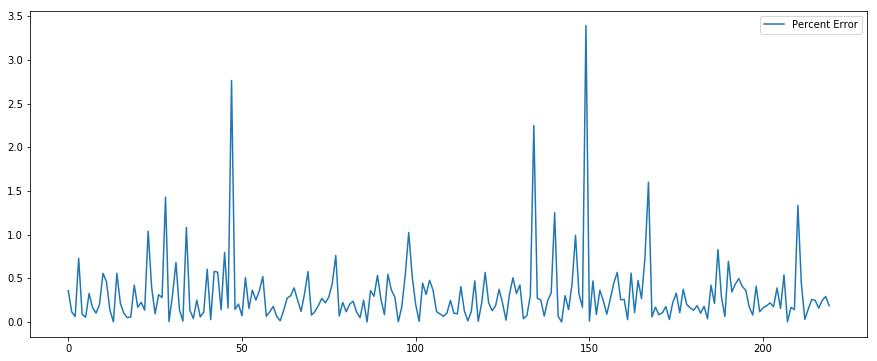

In [4]:
# Linear regression model:
print('* Linear regression model: ')
from sklearn.linear_model import LinearRegression
lir = LinearRegression()
lir_predicted = scoring(lir)
lir_errorRate = plotGraph(lir_predicted)

* Random forest regressor: 
Validation set: mean median absolute error:  2538.3018568804982
Test set: Daily error count:  24044612.777175166


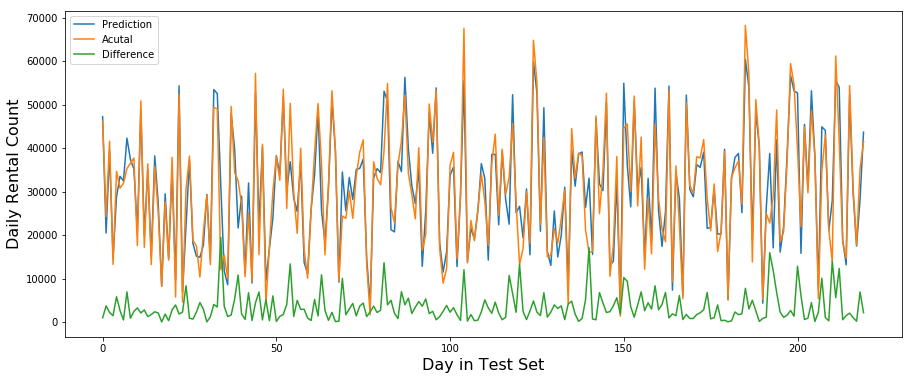

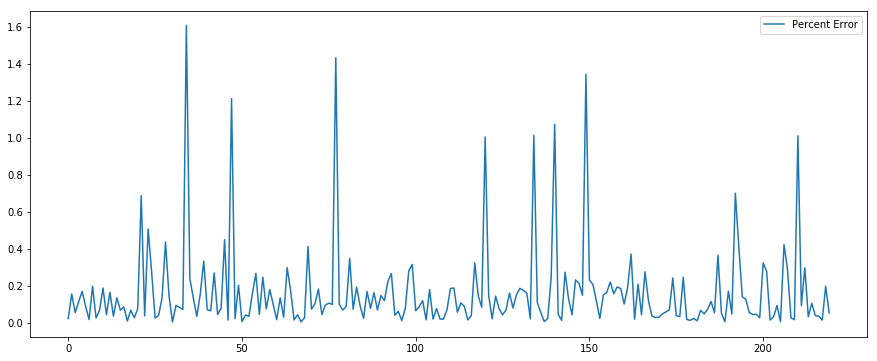

In [5]:
# Random forest regressor:
print('* Random forest regressor: ')
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=55, min_samples_leaf=3, random_state = 2)
rfr_predicted = scoring(rfr)
rfr_errorRate = plotGraph(rfr_predicted)

* Decision tree regressor: 
Validation set: mean median absolute error:  3219.1285714285723
Test set: Daily error count:  36085077.44521026


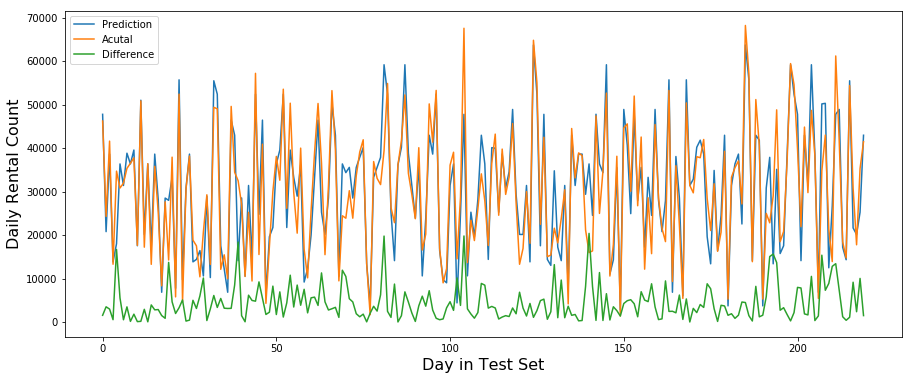

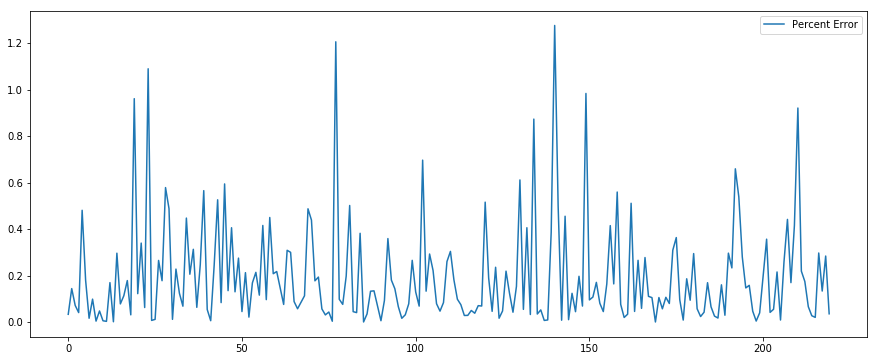

In [6]:
# Random forest regressor:
print('* Decision tree regressor: ')
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf = 3,
                            max_depth = 8,
                            random_state = 2)
dtr_predicted = scoring(dtr)
dtr_errorRate = plotGraph(dtr_predicted)

* Gradient boosting regressor: 
Validation set: mean median absolute error:  2698.6313861029876
Test set: Daily error count:  20946931.705987472


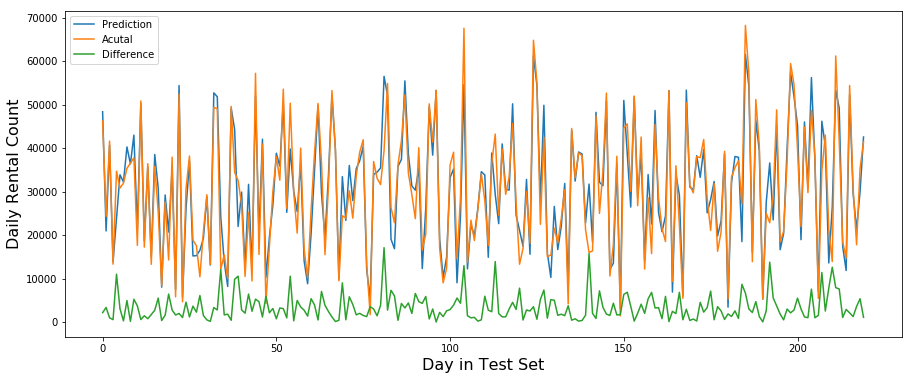

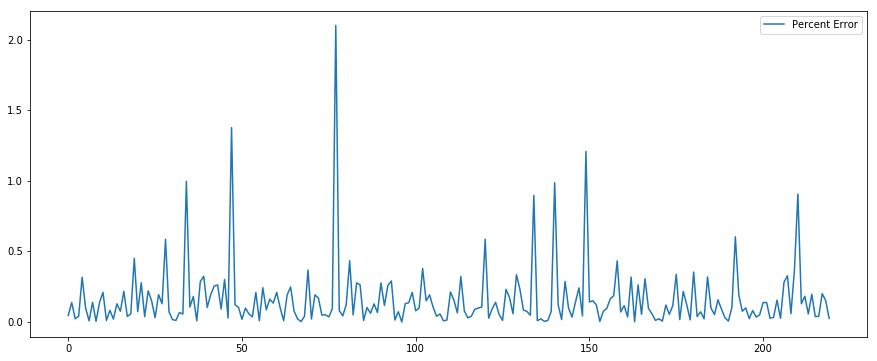

In [7]:
# Gradient boosting regressor:
print('* Gradient boosting regressor: ')
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 2)
gbr_predicted = scoring(gbr)
gbr_errorRate = plotGraph(gbr_predicted)

* Adaboost regressor: 
Validation set: mean median absolute error:  4171.520202020202
Test set: Daily error count:  38711822.33747557


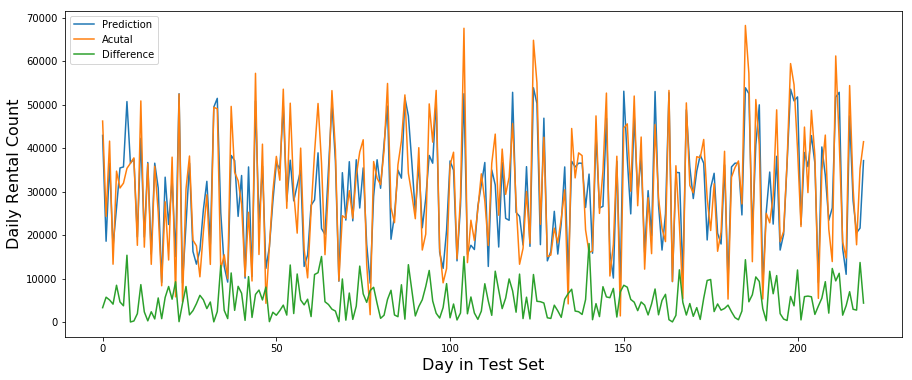

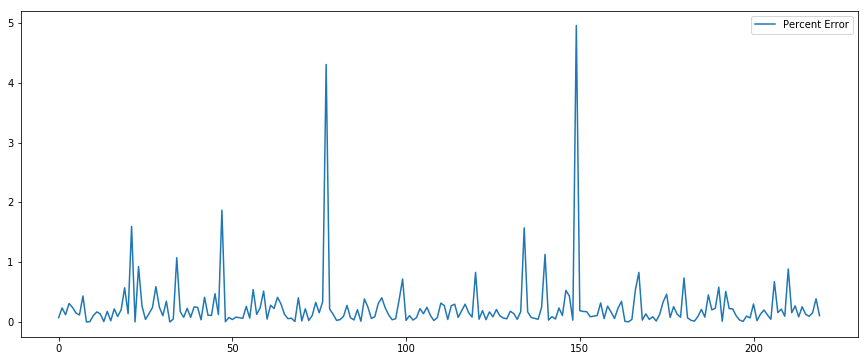

In [8]:
# Adaboost regressor:
print('* Adaboost regressor: ')
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators = 100,
                        learning_rate = 0.1,
                        loss = 'linear',
                        random_state = 2)
abr_predicted = scoring(abr)
abr_errorRate = plotGraph(abr_predicted)

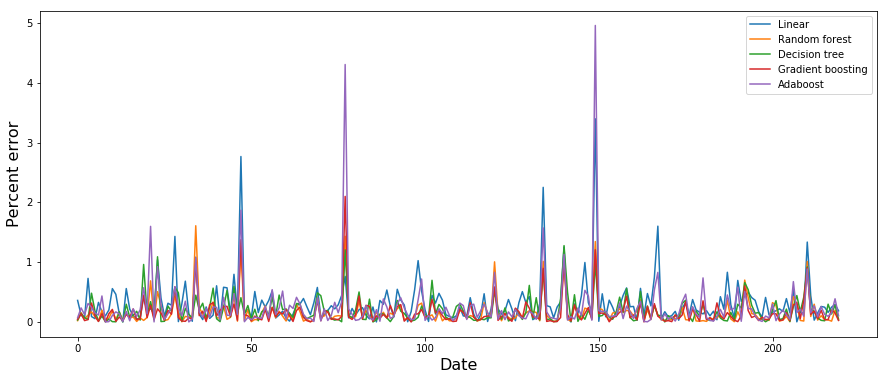

In [9]:
# Plot comparison chart
plt.figure(figsize=(15,6))
plt.plot(lir_errorRate.abs())
plt.plot(rfr_errorRate.abs())
plt.plot(dtr_errorRate.abs())
plt.plot(gbr_errorRate.abs())
plt.plot(abr_errorRate.abs())
plt.legend(['Linear', 'Random forest', 'Decision tree', 'Gradient boosting', 'Adaboost'])
plt.ylabel("Percent error", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.show()

In [10]:
# Plot box plot for comparison
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
data = []

data.append(go.Box( y=lir_errorRate.abs(), name='Linear regression', showlegend=True ) )
data.append(go.Box( y=rfr_errorRate.abs(), name='Random forest regressor', showlegend=True ) )
data.append(go.Box( y=dtr_errorRate.abs(), name='Decision tree regressor', showlegend=True ) )
data.append(go.Box( y=gbr_errorRate.abs(), name='Gradient boosting regressor', showlegend=True ) )
data.append(go.Box( y=abr_errorRate.abs(), name='Adaboosting regressor', showlegend=True ) )
py.iplot(data, filename='pandas-box-plot')

/Users/Carlos/anaconda3/envs/data/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

